In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy import stats

In [2]:
sns.set(rc={'figure.figsize': (20, 12)})
plt.rcParams["figure.figsize"] = [24, 14]
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Importação

In [3]:
filename = 'zapimoveis_SaoPaulo_processado.tsv'
df = pd.read_csv(filename, sep='\t')

## Descrição dos dados

In [4]:
for a in ['object', 'int64', 'float64']:
    atrs = list(df.select_dtypes(a))
    print(f'{len(atrs)} atributos do tipo {a}:\n', *atrs, '\n')

14 atributos do tipo object:
 DataHora AnuncioImobiliaria AnuncioSituacao AnuncioTipo AnuncioTitulo AnuncioDescricao AnuncioDataHoraCriacao AnuncioDataHoraAtualizacao EdificacaoDataConstrucao LocalizacaoEstado LocalizacaoCidade LocalizacaoBairro LocalizacaoRua LocalizacaoTipoPrecisao 

214 atributos do tipo int64:
 AnuncioIdentificador AreaUtil QuantidadeQuartos QuantidadeBanheiros GARAGE BARBECUE_GRILL GATED_COMMUNITY SAFETY_CIRCUIT GUEST_PARKING ELECTRIC_GENERATOR ENTRANCE_HALL RECEPTION GOURMET_SPACE GAMES_ROOM DISABLED_ACCESS ELEVATOR ELECTRONIC_GATE CONCIERGE_24H INTERNET_ACCESS CABLE_TV INTERCOM CARPET PETS_ALLOWED AIR_CONDITIONING FURNISHED AMERICAN_KITCHEN BICYCLES_PLACE LAUNDRY COWORKING KITCHEN SERVICE_AREA PARTY_HALL PLAYGROUND SPORTS_COURT BACKYARD TEEN_SPACE GREEN_SPACE GRASS WATCHMAN GARDEN SQUASH TENNIS_COURT ADULT_GAME_ROOM BALCONY DEPOSIT HIKING_TRAIL ALARM_SYSTEM GYM HOME_CINEMA MOUNTAIN_VIEW POOL SAUNA CLOSET MEETING_ROOM RESTAURANT SPA SECURITY_24_HOURS RECREATION_A

In [5]:
df.select_dtypes('object').describe()

,DataHora,AnuncioImobiliaria,AnuncioSituacao,AnuncioTipo,AnuncioTitulo,AnuncioDescricao,AnuncioDataHoraCriacao,AnuncioDataHoraAtualizacao,EdificacaoDataConstrucao,LocalizacaoEstado,LocalizacaoCidade,LocalizacaoBairro,LocalizacaoRua,LocalizacaoTipoPrecisao
count,55104,55104,55104,55104,55104,55081,55104,55104,55104,55104,55104,55094,55077,55104
unique,26267,1467,1,3,30824,50889,53881,46600,39827,1,1,823,4066,3
top,2021-06-21T04:17:38.411077,LOFT BRASIL,ACTIVE,STANDARD,São Paulo - Apartamento Padrão - Vila Mariana,"As informações contidas neste anúncio, tais co...",2016-07-25T22:26:20Z,2021-06-19T19:44:26.936Z,2021-01-01 03:00:00+00:00,São Paulo,São Paulo,Jardim Paulista,Alameda Franca,STREET
freq,23,8439,55104,45552,763,208,5,794,2194,55104,55104,2378,255,54785


In [6]:
df.select_dtypes('float64').describe()

,AreaTotal,QuantidadeSuites,QuantidadeVagasGaragem,EdificacaoAndares,EdificacaoUnidadePorAndar,LocalizacaoLatitude,LocalizacaoLongitude,UnidadeAndar,PrecoVenda,PrecoCondominio,PrecoIPTUAnual,EdificacaoIdadeAnos,PrecoVendaPorAreaUtil
count,5.083200e+04,55104.000000,55104.000000,13205.000000,12763.000000,55104.000000,55104.000000,9598.000000,5.510400e+04,5.230200e+04,4.218800e+04,55104.000000,55104.000000
mean,2.782530e+03,1.274390,1.772303,18.784248,5.411815,-23.582107,-46.658716,9.708793,1.375093e+06,3.695333e+03,1.662011e+03,19.474938,10707.676457
std,3.733869e+05,1.158283,1.204707,7.180192,3.377742,0.042022,0.048994,7.039751,1.868314e+06,1.140805e+05,6.569690e+04,16.504273,5097.088232
min,1.000000e+00,0.000000,0.000000,1.000000,1.000000,-23.877996,-46.806759,1.000000,9.000000e+04,1.000000e+00,1.000000e+00,-4.000000,1002.303500
25%,6.000000e+01,0.000000,1.000000,14.000000,4.000000,-23.611424,-46.684507,4.000000,4.770000e+05,6.000000e+02,1.350000e+02,6.000000,7327.990302
50%,9.200000e+01,1.000000,1.000000,19.000000,4.000000,-23.584375,-46.663990,9.000000,8.400000e+05,9.780000e+02,3.000000e+02,16.000000,9690.431247
75%,1.600000e+02,2.000000,2.000000,24.000000,8.000000,-23.551943,-46.635742,14.000000,1.587110e+06,1.700000e+03,7.500000e+02,31.000000,12783.522727
max,8.012016e+07,9.000000,14.000000,50.000000,31.000000,-23.401137,-46.374169,50.000000,4.800000e+07,1.900000e+07,1.200000e+07,120.000000,74500.000000


In [7]:
df.select_dtypes('int64').describe()

,AnuncioIdentificador,AreaUtil,QuantidadeQuartos,QuantidadeBanheiros,GARAGE,BARBECUE_GRILL,GATED_COMMUNITY,SAFETY_CIRCUIT,GUEST_PARKING,ELECTRIC_GENERATOR,ENTRANCE_HALL,RECEPTION,GOURMET_SPACE,GAMES_ROOM,DISABLED_ACCESS,ELEVATOR,ELECTRONIC_GATE,CONCIERGE_24H,INTERNET_ACCESS,CABLE_TV,INTERCOM,CARPET,PETS_ALLOWED,AIR_CONDITIONING,FURNISHED,AMERICAN_KITCHEN,BICYCLES_PLACE,LAUNDRY,COWORKING,KITCHEN,SERVICE_AREA,PARTY_HALL,PLAYGROUND,SPORTS_COURT,BACKYARD,TEEN_SPACE,GREEN_SPACE,GRASS,WATCHMAN,GARDEN,SQUASH,TENNIS_COURT,ADULT_GAME_ROOM,BALCONY,DEPOSIT,HIKING_TRAIL,ALARM_SYSTEM,GYM,HOME_CINEMA,MOUNTAIN_VIEW,POOL,SAUNA,CLOSET,MEETING_ROOM,RESTAURANT,SPA,SECURITY_24_HOURS,RECREATION_AREA,FOOTBALL_FIELD,CHILDRENS_POOL,ADULT_POOL,SECURITY_CAMERA,SECURITY_CABIN,WATER_TANK,PATROL,PAY_PER_USE_SERVICES,SOLARIUM,INTEGRATED_ENVIRONMENTS,BUILTIN_WARDROBE,BEDROOM_WARDROBE,BLINDEX_BOX,SOUNDPROOFING,LARGE_WINDOW,WOOD_FLOOR,NATURAL_VENTILATION,PANORAMIC_VIEW,ALUMINUM_WINDOW,LARGE_ROOM,COFFEE_SHOP,STAIR,PORCELAIN,MASSAGE,HOME_OFFICE,COPA,DINNER_ROOM,KITCHEN_CABINETS,GOURMET_BALCONY,NEAR_SCHOOL,NEAR_SHOPPING_CENTER,NEAR_PUBLIC_TRANSPORT,NEAR_HOSPITAL,YOUTH_GAME_ROOM,NEAR_ACCESS_ROADS,COLD_FLOOR,HEATING,PET_SPACE,SQUARE,REDARIO,MCMV,TREE_CLIMBING,FULL_CABLING,ESSENTIAL_PUBLIC_SERVICES,COVENTION_HALL,EXTERIOR_VIEW,FIREPLACE,PLATED_GAS,LAMINATED_FLOOR,LIBRARY,WHIRLPOOL,TOYS_PLACE,SIDE_ENTRANCE,PIZZA_OVEN,CINEMA,FULL_FLOOR,BATHROOM_CABINETS,BATHTUB,BAR,GOURMET_KITCHEN,LAKE_VIEW,SMALL_ROOM,CHILDREN_CARE,SERVICE_ENTRANCE,NUMBER_OF_FLOORS,LARGE_KITCHEN,FRUIT_TREES,COVERAGE,GAS_SHOWER,SANCA,HIGH_CEILING_HEIGHT,PANTRY,LAVABO,ARTESIAN_WELL,RAISED_FLOOR,WALLS_GRIDS,RAMP,LUNCH_ROOM,CORNER_PROPERTY,FENCE,VINYL_FLOOR,BARBECUE_BALCONY,BURNT_CEMENT,DRYWALL,VEGETABLE_GARDEN,POMAR,SERVICE_BATHROOM,PLANNED_FURNITURE,THERMAL_INSULATION,PRIVATE_POOL,ORCHID_PLACE,DOG_KENNEL,DECK,EMPLOYEE_DEPENDENCY,POOL_BAR,ZEN_SPACE,SEA_VIEW,AQUARIUM,COVERED_POOL,BEAUTY_CENTER,DRESS_ROOM,NEAR_SHOPPING_CENTER_2,GOLF_FIELD,REVERSIBLE_ROOM,HEATED_POOL,PLAYGROUND_2,DIVIDERS,COOKER,WALL_BALCONY,REFLECTING_POOL,GLASS_WALL,BACKGROUND_HOUSE,HALF_FLOOR,SKATE_LANE,SLAB,GARAGE_BAND,ELECTRICITY,WEST_FACING,SEWAGE,PAVED_STREET,SERVICE_ROOM,FREEZER,DRESS_ROOM2,HOT_TUB,PLATIBANDA,LAND,HELIPAD,EDICULE,GRAVEL,MEZZANINE,GEMINADA,WELL,BARN,HEADQUARTERS,CORRAL,LAKE,MARINA,CLIMBING_WALL,PASTURE,RIVER,PARKING,CARETAKER_HOUSE,ACLIVE,NORTH_FACING,SANDY,PLAN,VR_SELECTION,TIPO_DUPLEX,TIPO_FLAT,TIPO_KITNET,TIPO_LOFT,TIPO_PENTHOUSE,TIPO_STUDIO,TIPO_TRIPLEX,QT_PAVIMENTOS_DUPLEX,QT_PAVIMENTOS_TRIPLEX
count,5.510400e+04,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.0000,55104.000000,55104.000000,55104.000000,55104.0,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.000000,55104.00000,55104.000000,55104.000000,55104.000000,55104.000000,551

## Correlação com variáveis numéricas

In [8]:
colunas = ['PrecoVenda','AreaUtil','QuantidadeVagasGaragem','QuantidadeSuites','QuantidadeBanheiros','QuantidadeQuartos','EdificacaoAndares','PrecoCondominio','UnidadeAndar','PrecoIPTUAnual','LocalizacaoLatitude','EdificacaoIdadeAnos','LocalizacaoLongitude','EdificacaoUnidadePorAndar']
corr = df[colunas].corr()
pd.DataFrame(corr.sort_values(by='PrecoVenda', ascending=False)['PrecoVenda'])

,PrecoVenda
PrecoVenda,1.000000
AreaUtil,0.792812
QuantidadeVagasGaragem,0.673942
QuantidadeSuites,0.600083
QuantidadeBanheiros,0.568052
QuantidadeQuartos,0.475034
EdificacaoAndares,0.149194
PrecoCondominio,0.078810
UnidadeAndar,0.066794
PrecoIPTUAnual,0.037577


<AxesSubplot:>

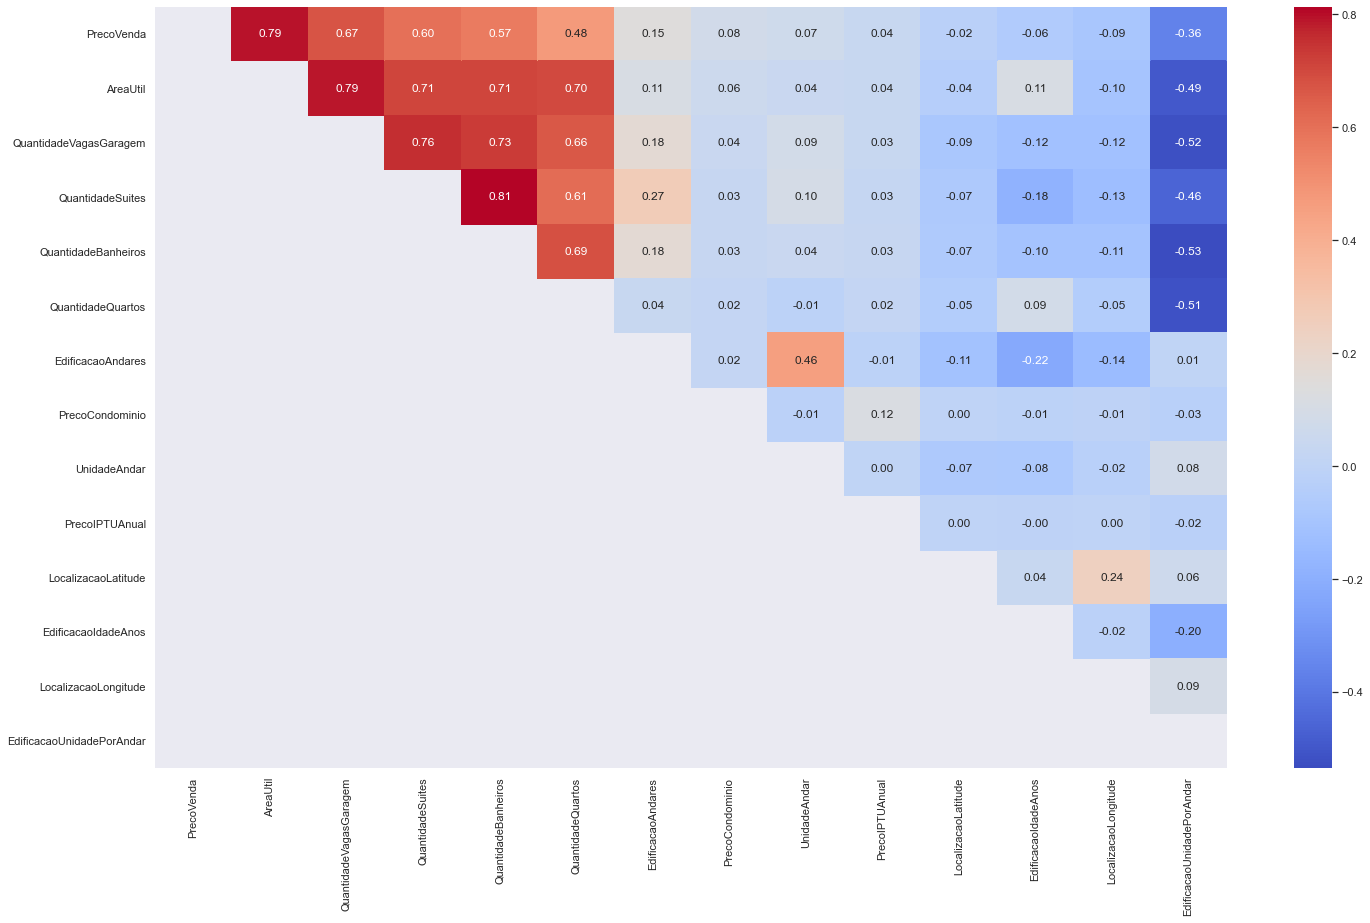

In [9]:
sns.heatmap(corr, annot = True, fmt='.2f', cmap='coolwarm', mask=np.tril(corr))

## Correlação com variáveis categóricas

In [12]:
# Atributos booleanos mais comuns
attrs_comuns = [c for c in df.columns if c.isupper()]

df_medias = pd.DataFrame()
for key in attrs_comuns:
  media = df.groupby(key)['PrecoVenda'].mean()
  if len(media) == 1:
    media = media.append(pd.Series([0], index=[1]))
  df_medias = df_medias.append({'Campo': key, 'Variação de preço': media[1]/media[0], 'Porcentagem do total': df[key].sum()/df[key].count()}, ignore_index=True)

df_medias.sort_values(by='Porcentagem do total', ascending=False)

,Campo,Porcentagem do total,Variação de preço
46,POOL,0.599158,1.289360
27,PARTY_HALL,0.580720,1.297677
28,PLAYGROUND,0.528165,1.208671
43,GYM,0.518238,1.099368
1,BARBECUE_GRILL,0.426666,1.120124
11,ELEVATOR,0.419588,1.205583
35,GARDEN,0.408264,1.330380
26,SERVICE_AREA,0.402766,1.362312
29,SPORTS_COURT,0.341717,0.995445
38,ADULT_GAME_ROOM,0.328651,1.103063


In [13]:
mais_comuns = list(df_medias[df_medias['Porcentagem do total'] >= 0.05]['Campo'])
print(len(mais_comuns))
print(mais_comuns)

49
['GARAGE', 'BARBECUE_GRILL', 'GATED_COMMUNITY', 'SAFETY_CIRCUIT', 'ELECTRIC_GENERATOR', 'RECEPTION', 'GOURMET_SPACE', 'GAMES_ROOM', 'DISABLED_ACCESS', 'ELEVATOR', 'ELECTRONIC_GATE', 'CONCIERGE_24H', 'INTERNET_ACCESS', 'CABLE_TV', 'INTERCOM', 'PETS_ALLOWED', 'AIR_CONDITIONING', 'FURNISHED', 'BICYCLES_PLACE', 'LAUNDRY', 'KITCHEN', 'SERVICE_AREA', 'PARTY_HALL', 'PLAYGROUND', 'SPORTS_COURT', 'GREEN_SPACE', 'GRASS', 'WATCHMAN', 'GARDEN', 'ADULT_GAME_ROOM', 'BALCONY', 'ALARM_SYSTEM', 'GYM', 'POOL', 'SAUNA', 'CLOSET', 'SPA', 'CHILDRENS_POOL', 'ADULT_POOL', 'BUILTIN_WARDROBE', 'HOME_OFFICE', 'COPA', 'DINNER_ROOM', 'KITCHEN_CABINETS', 'GOURMET_BALCONY', 'NEAR_SHOPPING_CENTER', 'NEAR_PUBLIC_TRANSPORT', 'NEAR_HOSPITAL', 'NUMBER_OF_FLOORS']


<AxesSubplot:>

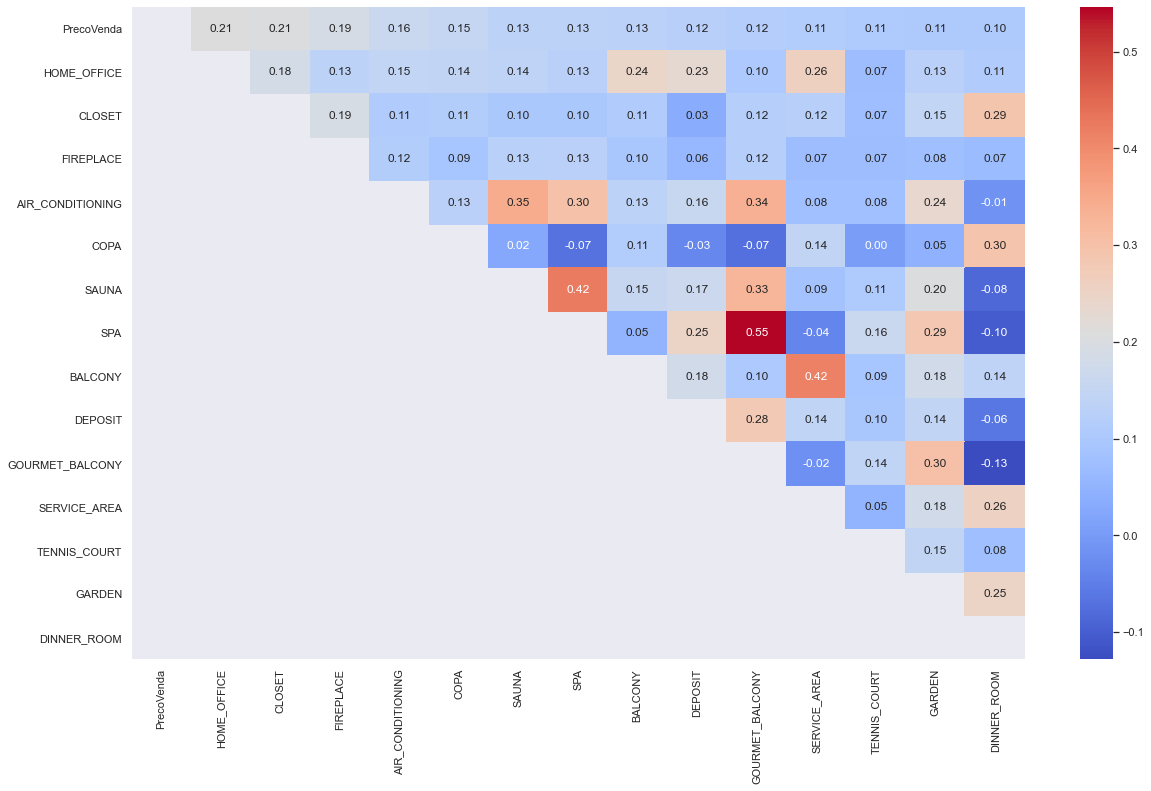

In [40]:
colunas = ['PrecoVenda'] + [c for c in df.columns if c.isupper()]
colunas.remove('NUMBER_OF_FLOORS')
top_corr = df[colunas].corr().sort_values(by='PrecoVenda', ascending=False, key=abs).head(15).sort_values(by='PrecoVenda', ascending=False)['PrecoVenda']
pd.DataFrame(top_corr)

corr = df[list(top_corr.index)].corr()
sns.heatmap(corr, annot = True, fmt='.2f', cmap='coolwarm', mask=np.tril(corr))

## Variação do preço com quantidade de vagas de garagem

<AxesSubplot:xlabel='PrecoVenda', ylabel='Count'>

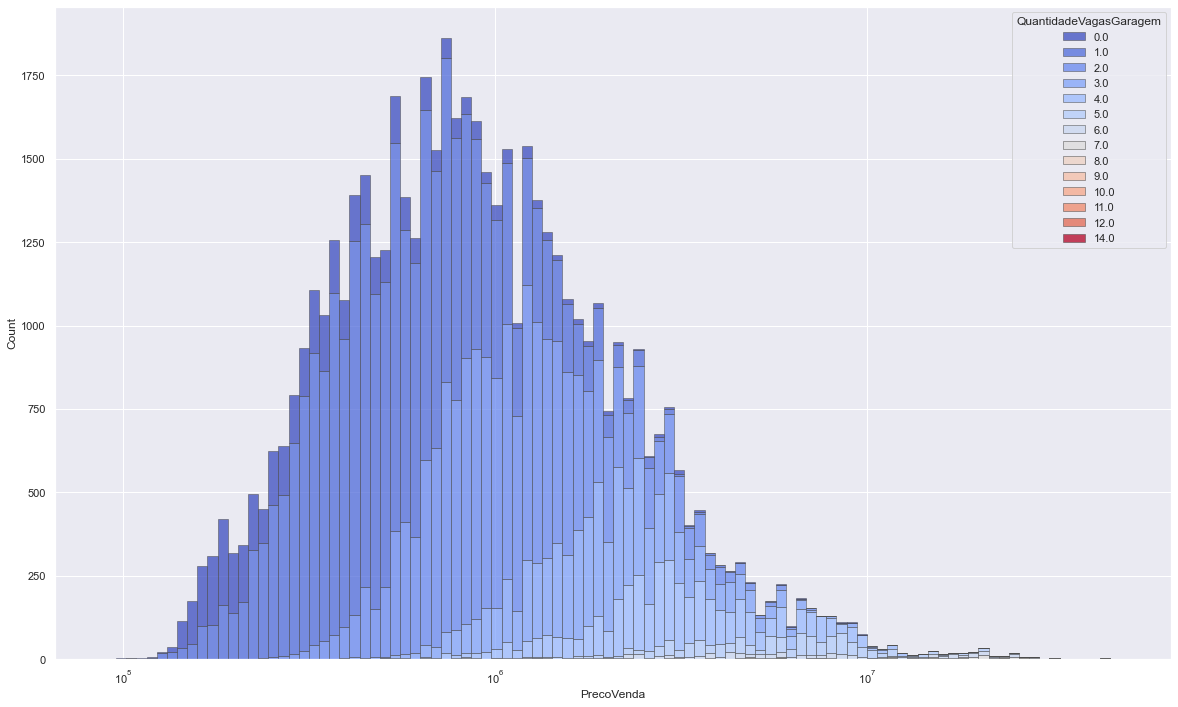

In [44]:
sns.histplot(df, x="PrecoVenda", hue="QuantidadeVagasGaragem", multiple="stack", edgecolor=".3", linewidth=.5, palette="coolwarm", log_scale=True)

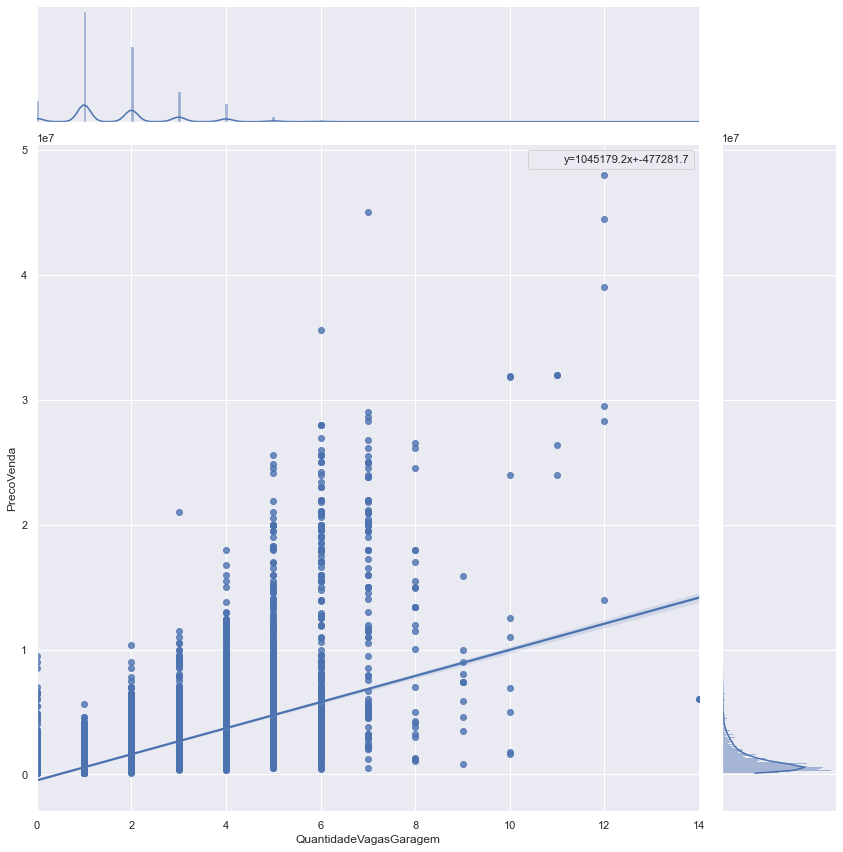

In [20]:
slope, intercept, r, p, s = stats.linregress(df['QuantidadeVagasGaragem'],df['PrecoVenda'])
jp = sns.jointplot(x="QuantidadeVagasGaragem", y="PrecoVenda", data=df, kind="reg", height=12)
p, = jp.ax_joint.plot([], [], linestyle="", alpha=0)
jp.ax_joint.legend([p],['y={0:.1f}x+{1:.1f}'.format(slope,intercept)])
plt.show()

## Variação do preço com a quantidade de suítes

<AxesSubplot:xlabel='PrecoVenda', ylabel='Count'>

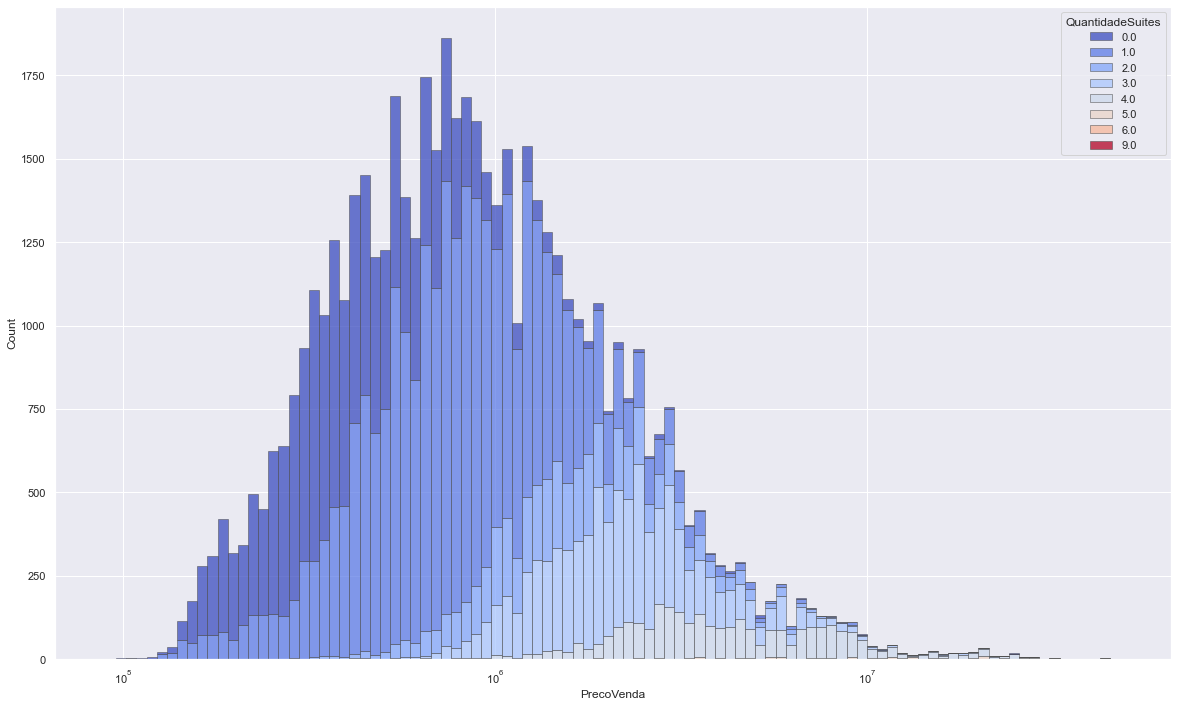

In [45]:
sns.histplot(df, x="PrecoVenda", hue="QuantidadeSuites", multiple="stack", edgecolor=".3", linewidth=.5, palette="coolwarm", log_scale=True)

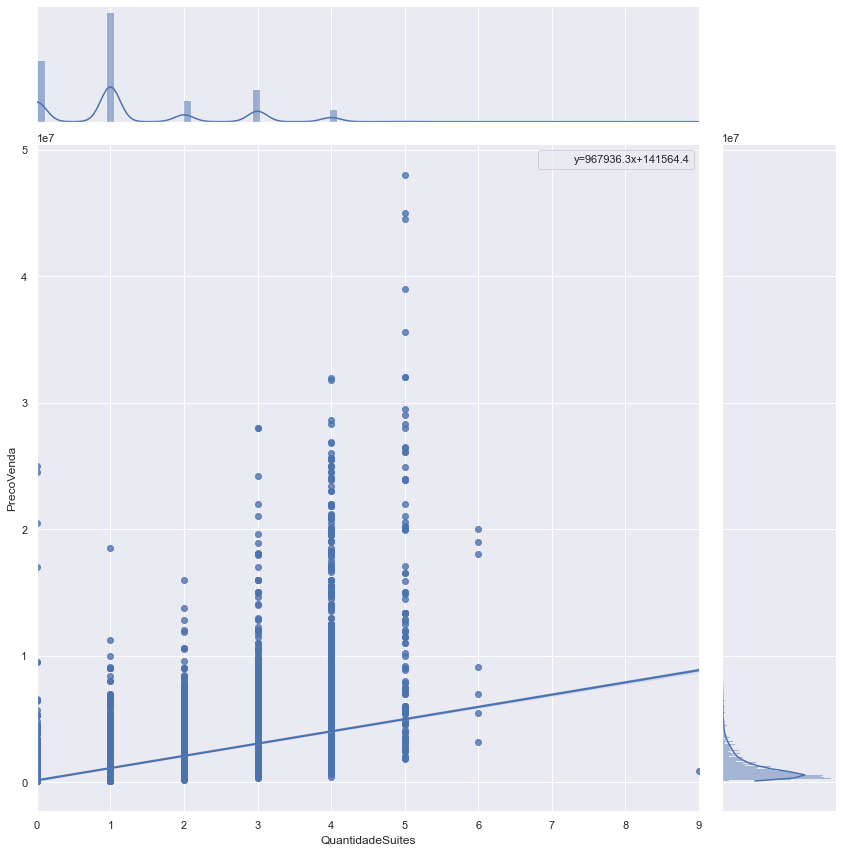

In [21]:
slope, intercept, r, p, s = stats.linregress(df['QuantidadeSuites'],df['PrecoVenda'])
jp = sns.jointplot(x="QuantidadeSuites", y="PrecoVenda", data=df, kind="reg", height=12)
p, = jp.ax_joint.plot([], [], linestyle="", alpha=0)
jp.ax_joint.legend([p],['y={0:.1f}x+{1:.1f}'.format(slope,intercept)])
plt.show()

## Variação do preço com quantidade de banheiros

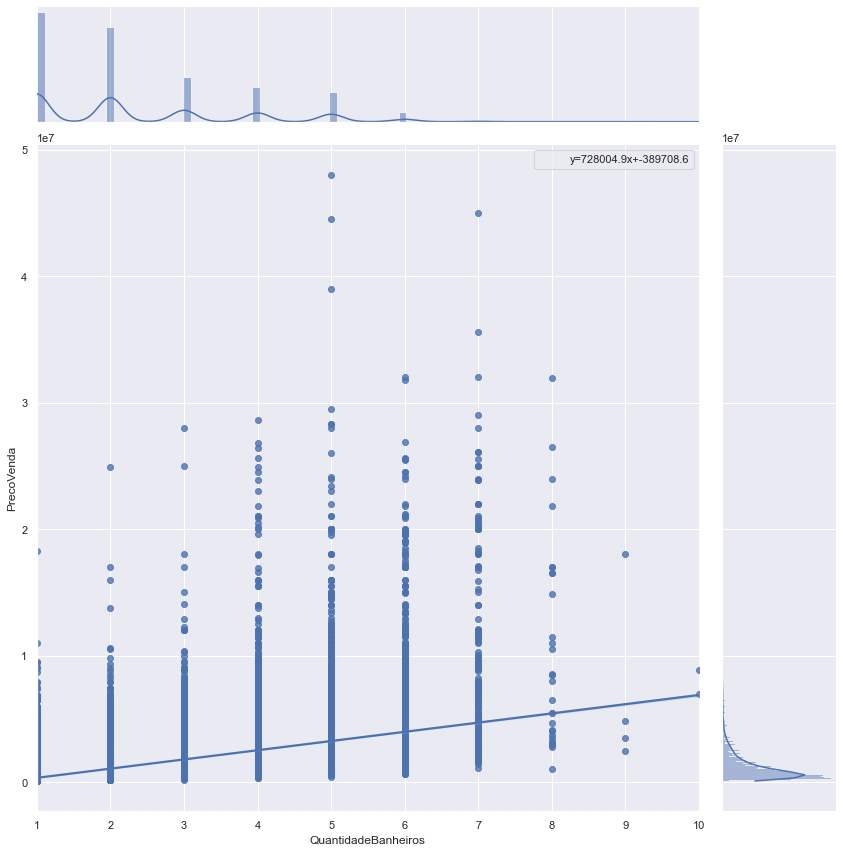

In [22]:
slope, intercept, r, p, s = stats.linregress(df['QuantidadeBanheiros'],df['PrecoVenda'])
jp = sns.jointplot(x="QuantidadeBanheiros", y="PrecoVenda", data=df, kind="reg", height=12)
p, = jp.ax_joint.plot([], [], linestyle="", alpha=0)
jp.ax_joint.legend([p],['y={0:.1f}x+{1:.1f}'.format(slope,intercept)])
plt.show()

## Variação de preço de acordo com a área

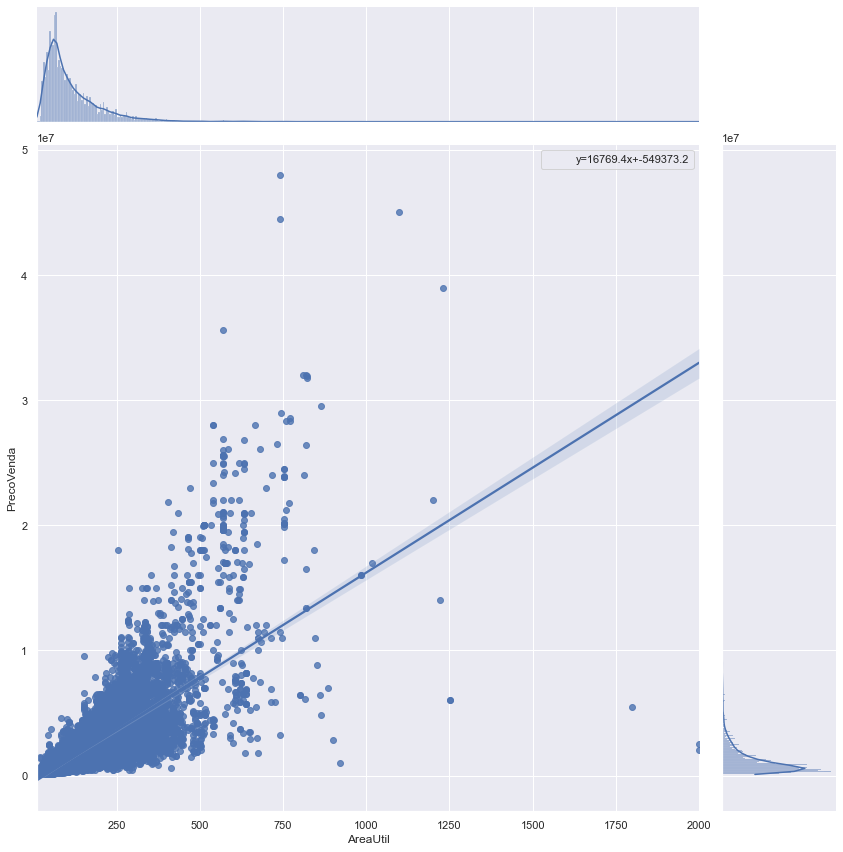

In [16]:
slope, intercept, r, p, s = stats.linregress(df['AreaUtil'],df['PrecoVenda'])
jp = sns.jointplot(x="AreaUtil", y="PrecoVenda", data=df, kind="reg", height=12)
p, = jp.ax_joint.plot([], [], linestyle="", alpha=0)
jp.ax_joint.legend([p],['y={0:.1f}x+{1:.1f}'.format(slope,intercept)])
plt.show()

## Variação do preço ao longo dos anos

<AxesSubplot:title={'center':'PrecoVendaPorAreaUtil'}, xlabel='EdificacaoIdadeIntervalos'>

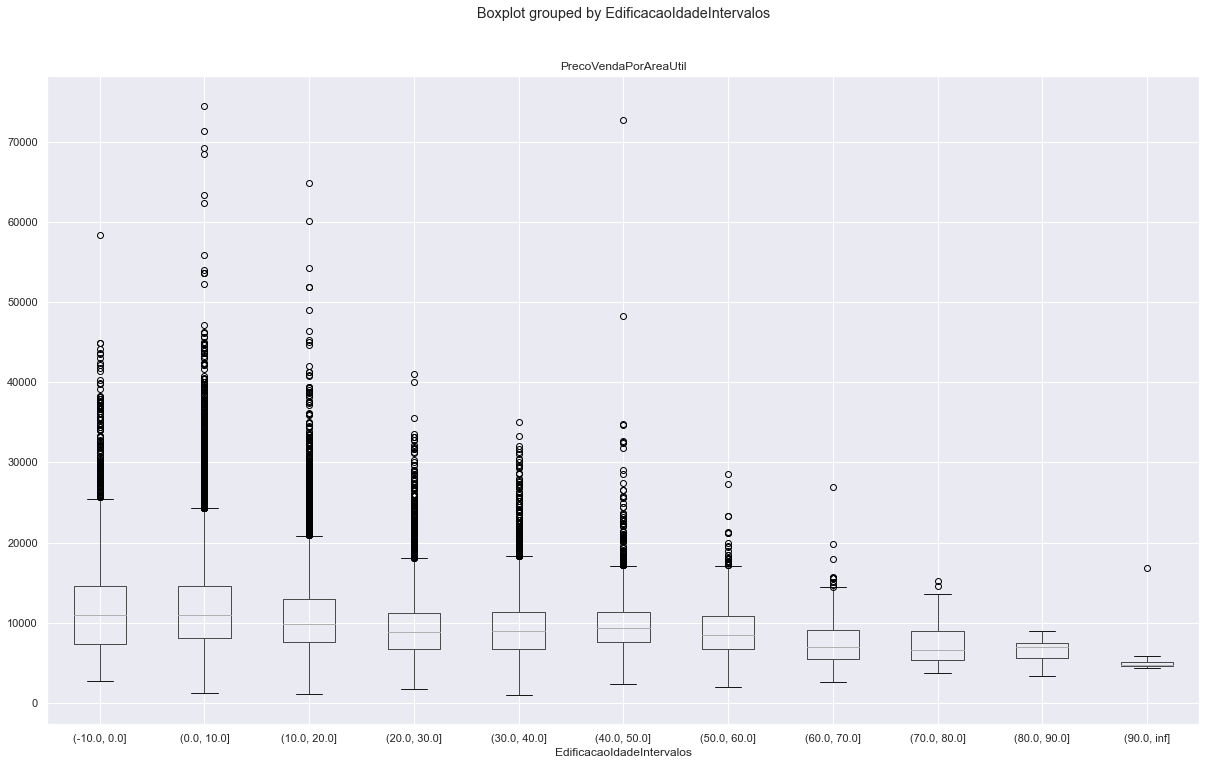

In [12]:
df['EdificacaoIdadeIntervalos'] = pd.cut(df['EdificacaoIdadeAnos'], list(range(-10,100, 10)) + [np.inf])
df.boxplot(column='PrecoVendaPorAreaUtil', by='EdificacaoIdadeIntervalos')

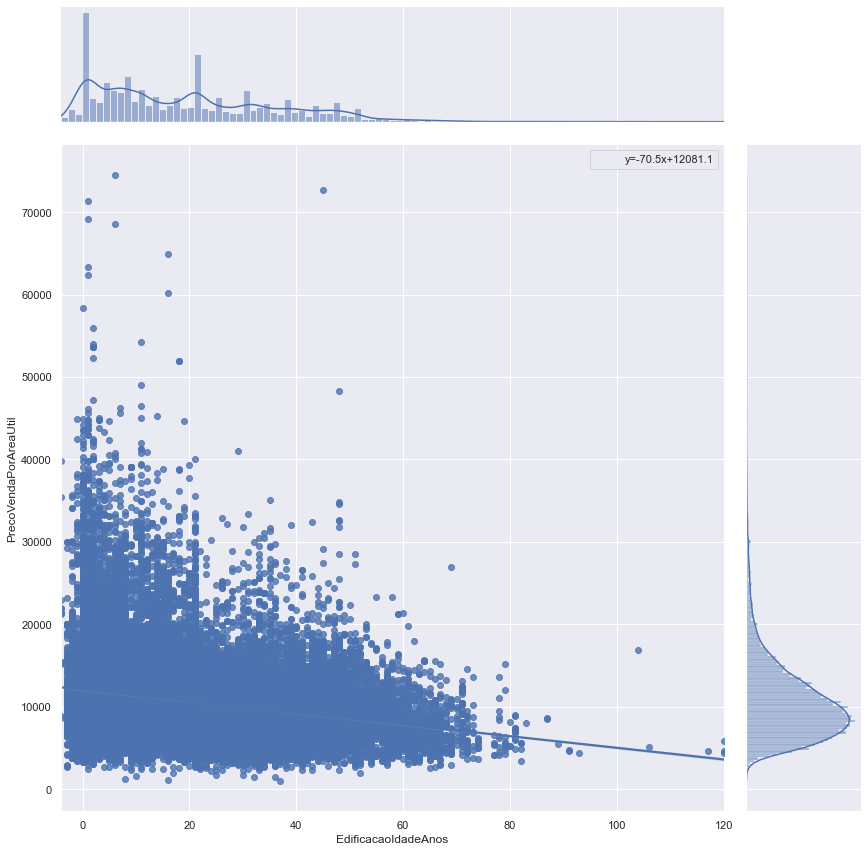

In [17]:
slope, intercept, r, p, s = stats.linregress(df['EdificacaoIdadeAnos'],df['PrecoVendaPorAreaUtil'])
jp = sns.jointplot(x="EdificacaoIdadeAnos", y="PrecoVendaPorAreaUtil", data=df, kind="reg", height=12)
p, = jp.ax_joint.plot([], [], linestyle="", alpha=0)
jp.ax_joint.legend([p],['y={0:.1f}x+{1:.1f}'.format(slope,intercept)])
plt.show()

## Variação do preço de acordo com o número de andares

<AxesSubplot:title={'center':'PrecoVendaPorAreaUtil'}, xlabel='EdificacaoAndaresIntervalos'>

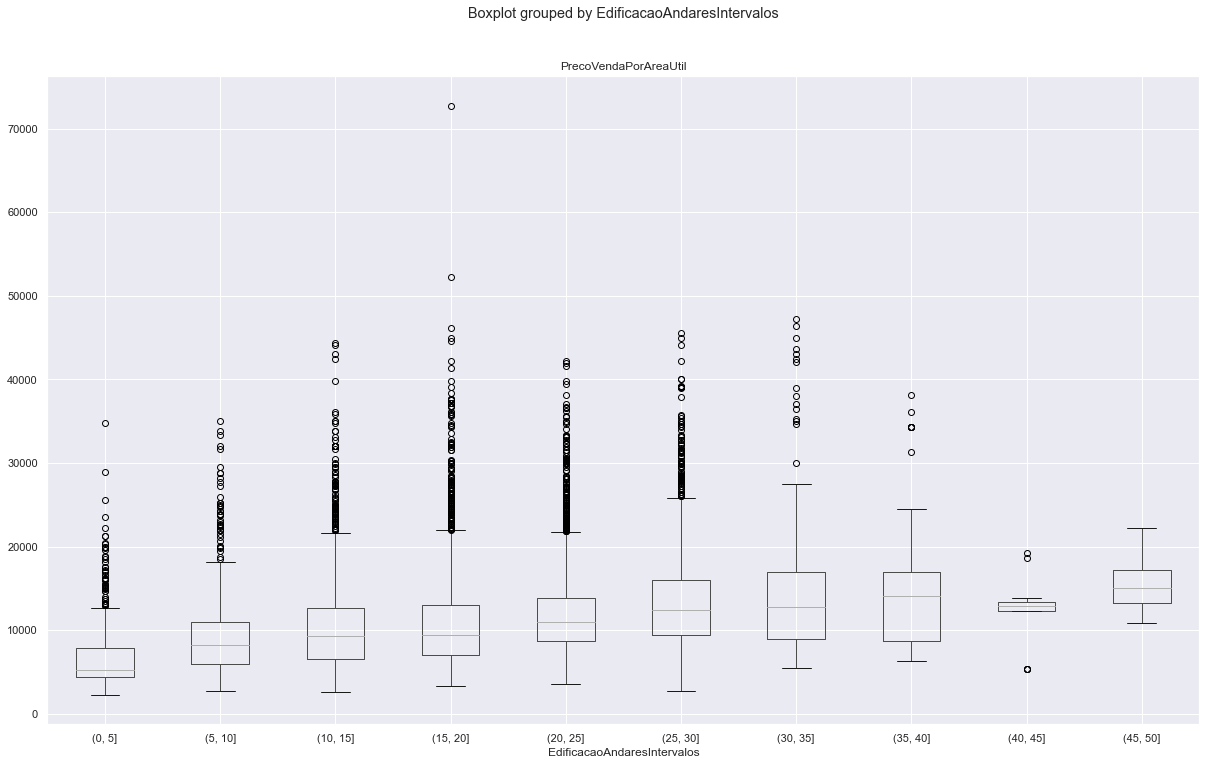

In [18]:
df['EdificacaoAndaresIntervalos'] = pd.cut(df['EdificacaoAndares'], list(range(0, 51, 5)))
df.boxplot(column='PrecoVendaPorAreaUtil', by='EdificacaoAndaresIntervalos')

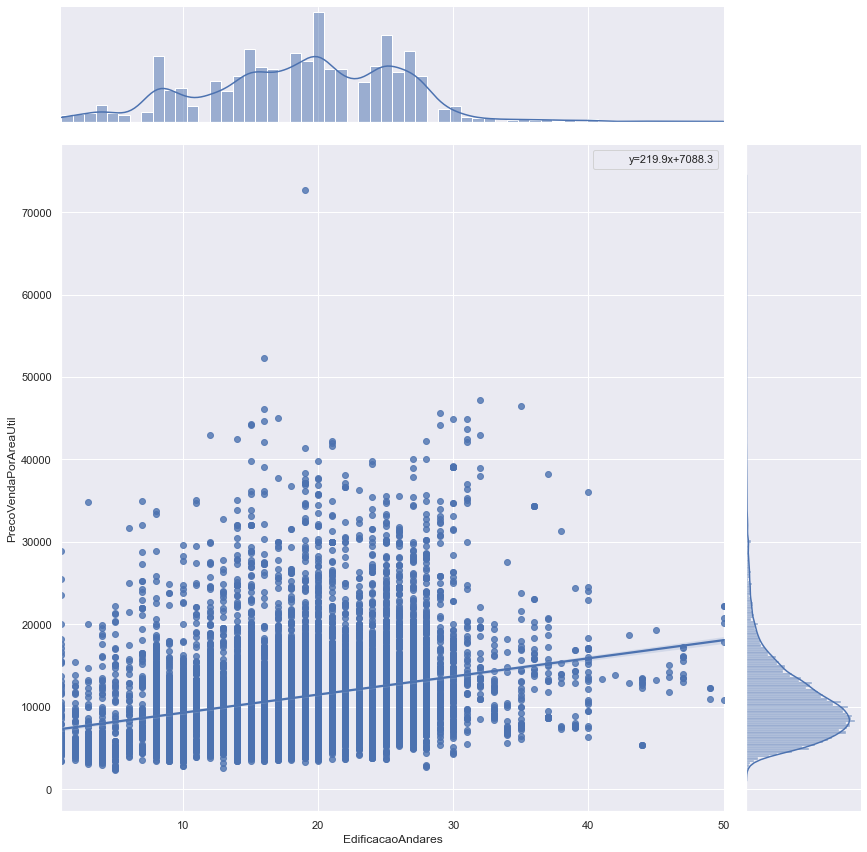

In [18]:
mask = ~np.isnan(df['EdificacaoAndares'])
slope, intercept, r, p, s = stats.linregress(df[mask]['EdificacaoAndares'],df[mask]['PrecoVendaPorAreaUtil'])
jp = sns.jointplot(x="EdificacaoAndares", y="PrecoVendaPorAreaUtil", data=df, kind="reg", height=12)
p, = jp.ax_joint.plot([], [], linestyle="", alpha=0)
jp.ax_joint.legend([p],['y={0:.1f}x+{1:.1f}'.format(slope,intercept)])
plt.show()

## Andar do apartamento

<AxesSubplot:title={'center':'PrecoVendaPorAreaUtil'}, xlabel='UnidadeAndarIntervalos'>

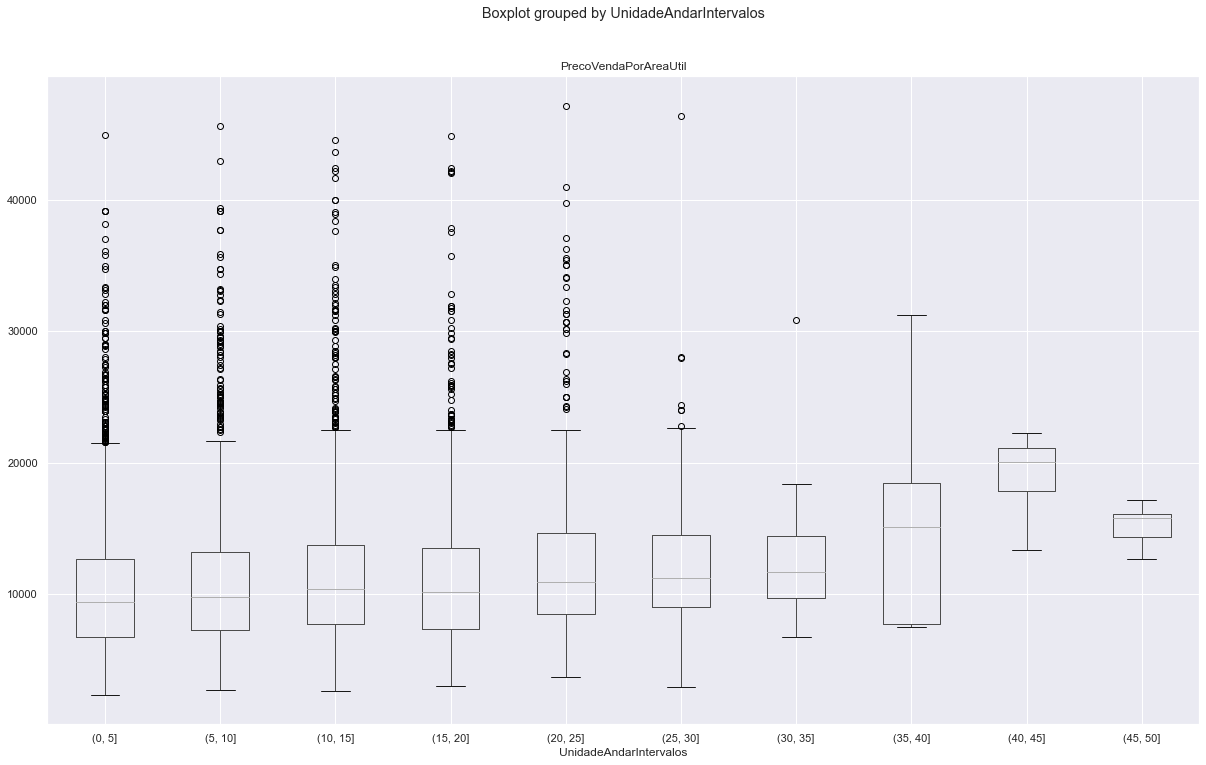

In [22]:
df['UnidadeAndarIntervalos'] = pd.cut(df['UnidadeAndar'], list(range(0, 51, 5)))
df.boxplot(column='PrecoVendaPorAreaUtil', by='UnidadeAndarIntervalos')

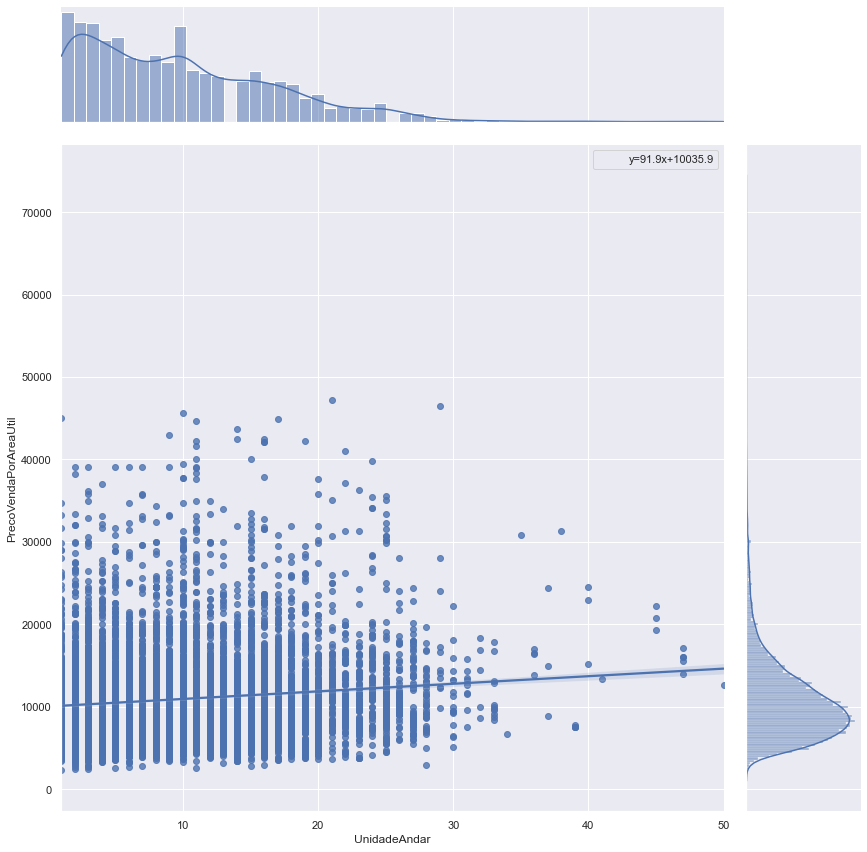

In [19]:
mask = ~np.isnan(df['UnidadeAndar'])
slope, intercept, r, p, s = stats.linregress(df[mask]['UnidadeAndar'],df[mask]['PrecoVendaPorAreaUtil'])
jp = sns.jointplot(x="UnidadeAndar", y="PrecoVendaPorAreaUtil", data=df, kind="reg", height=12)
p, = jp.ax_joint.plot([], [], linestyle="", alpha=0)
jp.ax_joint.legend([p],['y={0:.1f}x+{1:.1f}'.format(slope,intercept)])
plt.show()

## Mapa

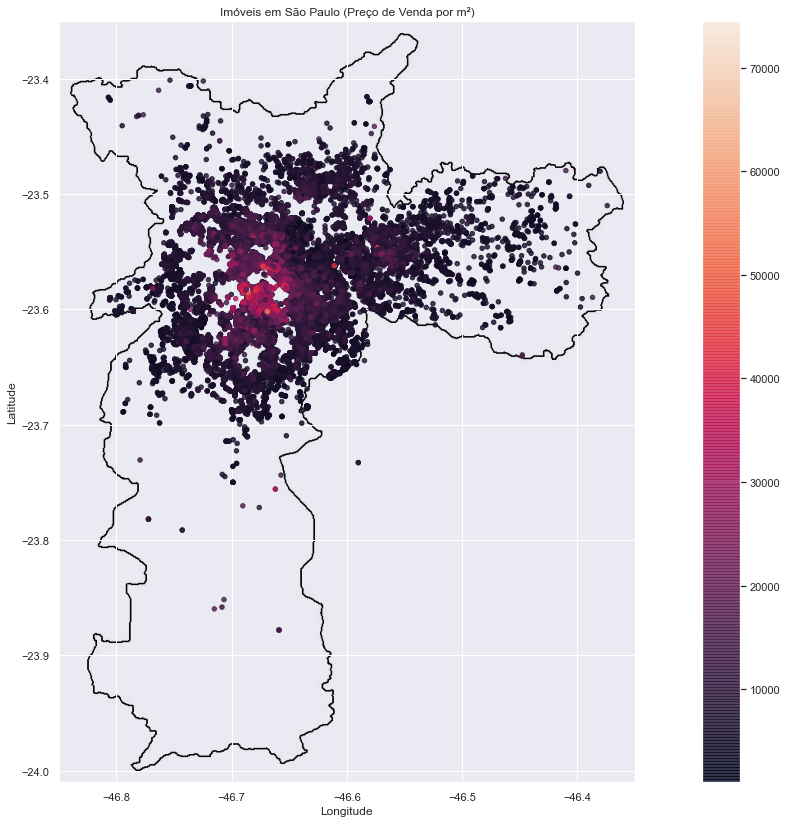

In [9]:
img = plt.imread("SP.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-46.84, -46.36, -24.00, -23.36])
sc = ax.scatter(df['LocalizacaoLongitude'], df['LocalizacaoLatitude'], c=df['PrecoVendaPorAreaUtil'], s=20, alpha=0.8)
plt.title('Imóveis em São Paulo (Preço de Venda por m²)')
plt.axis('square')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(sc)
plt.xlim([-46.85, -46.35])
plt.ylim([-24.01, -23.35])
plt.show()